<a href="https://colab.research.google.com/github/k4404c/MAT-422/blob/main/HW1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1.4 Principal Component Analysis**
Important Topics:
* Singular Value Decomposition
* Low-Rank Matrix Approximations
* Principal Component Analysis


In [96]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

def findNorm(vector):
  sum=0
  for item in vector:
    sum += item**2
  return math.sqrt(sum)

def findInnerProduct(vector1,vector2):
  innerProduct = 0
  for i in range(len(vector1)):
   innerProduct+= vector1[i] * vector2[i]
  return innerProduct

#### **Singular Value Decomposition**:
* for m ≥ n:\
$A_{mxn} = [u_1 | ... | u_2] * \begin{bmatrix}
    σ_1 & 0 & 0 \\
    0 & ... & 0\\
    0 & 0 & σ_n &  \\
    0 & 0 & 0 &
  \end{bmatrix}  * \begin{bmatrix}
    v_1^T \\
    ... \\
    v_n^T
  \end{bmatrix}
 = UΣV^T$

 \
* for m ≤ n:\
$A_{mxn} = [u_1 | ... | u_2] * \begin{bmatrix}
    σ_1 & 0 & 0 & ...\\
    0 & ... & 0 & ...\\
    0 & 0 & σ_n & ... \\
  \end{bmatrix}  * \begin{bmatrix}
    v_1^T \\
    ... \\
    v_n^T
  \end{bmatrix}
 = UΣV^T$

 * U **orthoganal** $m$x$m$ , $U^{-1} = U^T$
 * Σ **diagonal** $m$x$n$n, $σ_1 ≥ σ_2 ≥ ... ≥ σ_m ≥ 0$
 * V **orthoganl** $$nx$n$, $V^{-1} = V^T$

- $U_rΣ_rV_r^T = σ_1u_1v_1^T + ... + σ_ru_rv_r^T$,    with rank(A) = $r$



- The singular values of $σ_j$ are the square root of the eigenvalues $λ_j$ of $A^TA$
- The columns {$v_1,...,v_r$} are the normalized eigenvectors of $A^TA$
- ${u_1,...,u_r}$ is given by $u_j = \frac{1}{σ_j}*A*v_j$
 * $U_r = AV_rΣ^{-1}_r$
 * if needed, $u_m =$ normalize$(N(A^T))$



In [97]:
A = np.column_stack(([2 , -1], [2 , 2]))


eigen_vals, eigen_vectors = np.linalg.eig(np.dot(A.transpose(),A))


sigmas = []
for val in eigen_vals:
  sigmas.append(math.sqrt(val))


U = np.empty((np.linalg.matrix_rank(A)), np.linalg.matrix_rank(A))

eigen_vectors = eigen_vectors.transpose()

for i in range(np.linalg.matrix_rank(A)):
  U = np.column_stack((U,(np.multiply((1.0/sigmas[i]) , np.dot(A, eigen_vectors[i])))))

U = np.column_stack((U[:,1],U[:,2]))

ev = eigen_vectors.transpose()

temp = ev[:,0].copy()
ev[:,0]  = ev[:,1]
ev[:,1] =  temp

temp = U[:,0].copy()
U[:,0]  = U[:,1]
U[:,1] =  temp



sigma_matrix = np.zeros((np.linalg.matrix_rank(A),np.linalg.matrix_rank(ev)))
sigmas.sort(reverse = True)
for i in range ((np.linalg.matrix_rank(eigen_vectors))):
  sigma_matrix[i,i] = sigmas[i]



print(A - np.dot(U , np.dot(sigma_matrix,eigen_vectors))) #basically 0, demonstrates how A = UsigmaV^T
#apologies for how specialized and poor this code is.

[[ 0.00000000e+00  0.00000000e+00]
 [-1.11022302e-16  0.00000000e+00]]


#### **Low-Rank Matrix Approximations**:
- $U_rΣ_rV_r^T = σ_1u_1v_1^T + ... + σ_ru_rv_r^T$,    with rank(A) = $r$

* Can be demonstrated in image compression


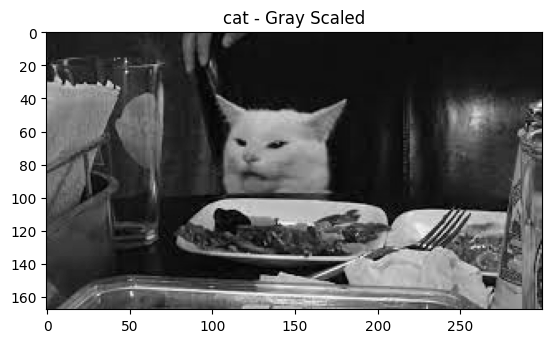


Original Image Size: 0.60 mB


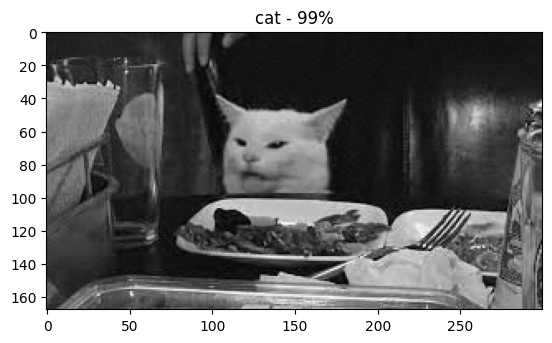


99% Image Size: 0.43 mB
1.40 times smaller than the original


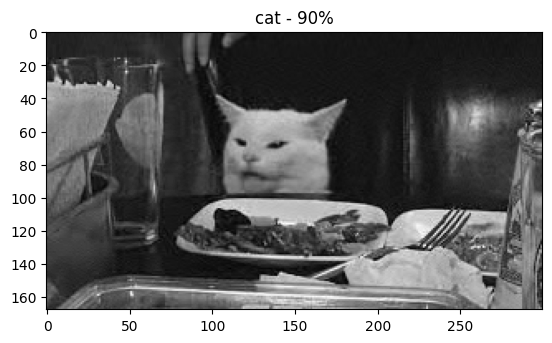


90% Image Size: 0.38 mB
1.57 times smaller than the original


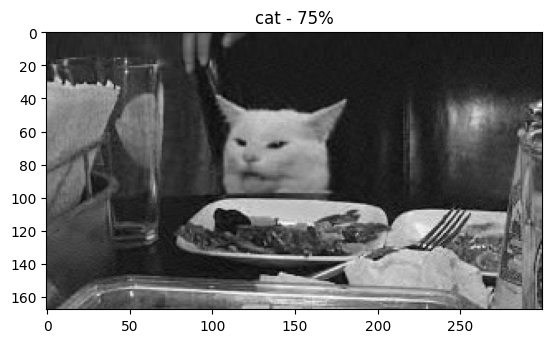


75% Image Size: 0.31 mB
1.93 times smaller than the original


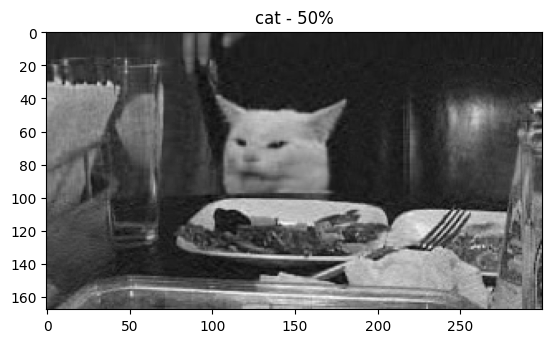


50% Image Size: 0.20 mB
3.04 times smaller than the original


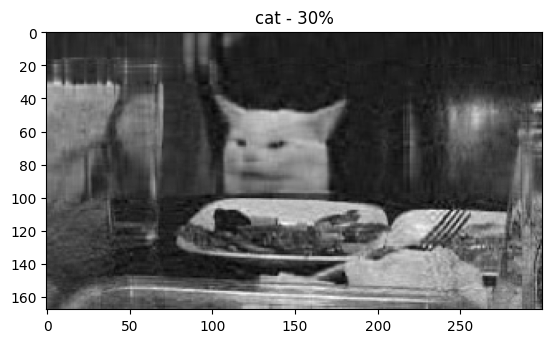


30% Image Size: 0.11 mB
5.27 times smaller than the original


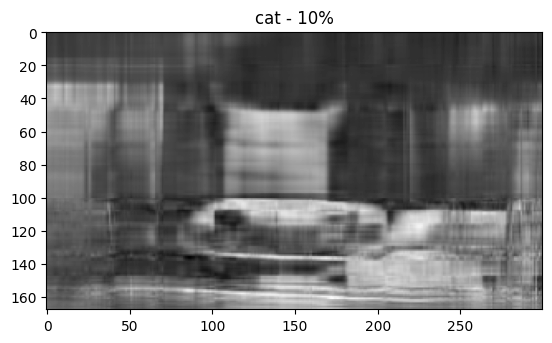


10% Image Size: 0.04 mB
16.48 times smaller than the original


In [98]:
from matplotlib.image import imread


cat = imread("cat_dinnertable.jpeg")
cat_gs = np.mean(cat, -1)



plt.figure()
plt.imshow(cat_gs).set_cmap('gray')
plt.title("cat - Gray Scaled")
plt.show()


u, s, vt = np.linalg.svd(cat_gs, full_matrices = False)
original_size = (u.nbytes + s.nbytes + vt.nbytes)/2**20
print(f"\nOriginal Image Size: {original_size:.2f} mB")
s = np.diag(s)


for r in [99, 90, 75, 50, 30, 10]:
  rankApproximate = u[:,:r] @ s[0:r,:r] @ vt[:r,:]
  #plt.figure(j+1)
  plt.figure()
  plt.imshow(rankApproximate).set_cmap('gray')
  plt.title("cat - {percentage}%".format(percentage = r))
  plt.show()
  r_size = (u[:,:r].nbytes + s[0:r,:r].nbytes + vt[:r,:].nbytes)/2**20
  print(f"\n{r}% Image Size: {r_size:.2f} mB")
  print(f"{original_size/r_size:.2f} times smaller than the original")




#### **Principal Component Analysis**:

$M = \frac{1}{N} (X1 + · · · + XN )$
- M is the mean of the vector.

$X̂_k = X_k − M$\
$B = [X̂_1, X̂_2, ... X̂_N]$ New matrix has mean at the center of the plot\
$S = \frac{1}{N-1}  BB^T$
- Since $BB^T$ is positive semidefinite, so is S


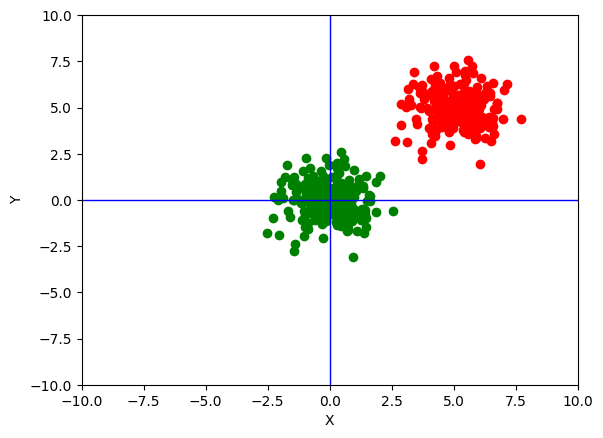

In [100]:
from numpy.random.mtrand import rand
import random

from pylab import randn
plt.figure()
X = randn(200)+ 5
Y = randn(200)+ 5

X_avgd =  X - X.mean()
Y_avgd =  Y - Y.mean()
# Set x-axis range
plt.xlim((-10,10))
# Set y-axis range
plt.ylim((-10,10))
# Draw lines to split quadrants
plt.plot([0,0],[-10,10], linewidth=1, color='blue' )


plt.plot([-10,10],[0,0], linewidth=1, color='blue' )
plt.scatter(X,Y, color='r')
plt.scatter(X_avgd,Y_avgd, color='g')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
#red is original, green is original - mean

* Assume $X = [X_1, X_2, ..., X_N]$ is already in mean-deviation form, X is $p$x$N$
* The goal of principal component analysis
(PCA) is to find k, (k ≤ p) orthonormal vectors $v_1, ..., v_k$, (top k principal components) that maximize the objective function

$v^T_jXX^T v_j = (X^T v_j)^T (X^T v_j) = ∑_{i=1}^N⟨X_i · v_j⟩^2$\
* $X^TX$ is a $p$x$p$ matrix
* $XX^T = V diag(λ1, ....,λp)V^T , or V^T XX^T V = diag(λ1, ....,λp)$
* $x = Vy$


$S = \frac{1}{N-1}  XX^T$, represents covariance matrix\
Since we know what $XX^T$ equals, we know that:
* $trace(S) = \frac{1}{N-1} ∑_{j = 1}^p λ_j$

Because $trace(S) = trace(V^TλV)$, the fraction of the first k term truncation is:
* $\frac{∑_{j=1}^kλ_j}{∑_{j=1}^pλ_j}$



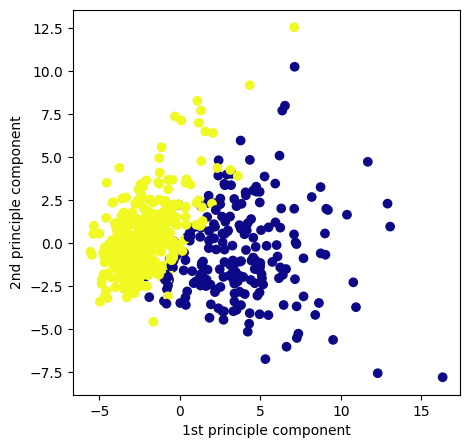

In [101]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

cancer = load_breast_cancer()
cancer.keys()
#print(cancer['DESCR'])

df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
df.head()
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df) #makes data in mean-deviation form

pca = PCA(n_components=3) #fitting data to 2 dimensions
pca.fit(scaled_data)

x_pca = pca.transform(scaled_data)
scaled_data.shape
x_pca.shape



plt.figure(figsize = (5,5))
plt.scatter(x_pca[:,0],x_pca[:,1], c = cancer['target'],cmap='plasma' )
plt.xlabel("1st principle component")
plt.ylabel("2nd principle component")
plt.show()



